In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.dropna()
df.drop_duplicates()
df.drop('Loan_ID',axis=1,inplace=True)
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [5]:
df.head()

le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male','Female'])
df['Gender'] = le_gender.transform(df['Gender'])

le_married = preprocessing.LabelEncoder()
le_married.fit(['Yes','No'])
df['Married'] = le_married.transform(df['Married'])

le_education = preprocessing.LabelEncoder()
le_education.fit(['Graduate','Not Graduate'])
df['Education'] = le_education.transform(df['Education'])

le_employed = preprocessing.LabelEncoder()
le_employed.fit(['Yes','No'])
df['Self_Employed'] = le_employed.transform(df['Self_Employed'])

le_region = preprocessing.LabelEncoder()
le_region.fit(['Rural','Urban','Semiurban'])
df['Property_Area'] = le_region.transform(df['Property_Area'])

df[0:5]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [6]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
y[0:5]

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

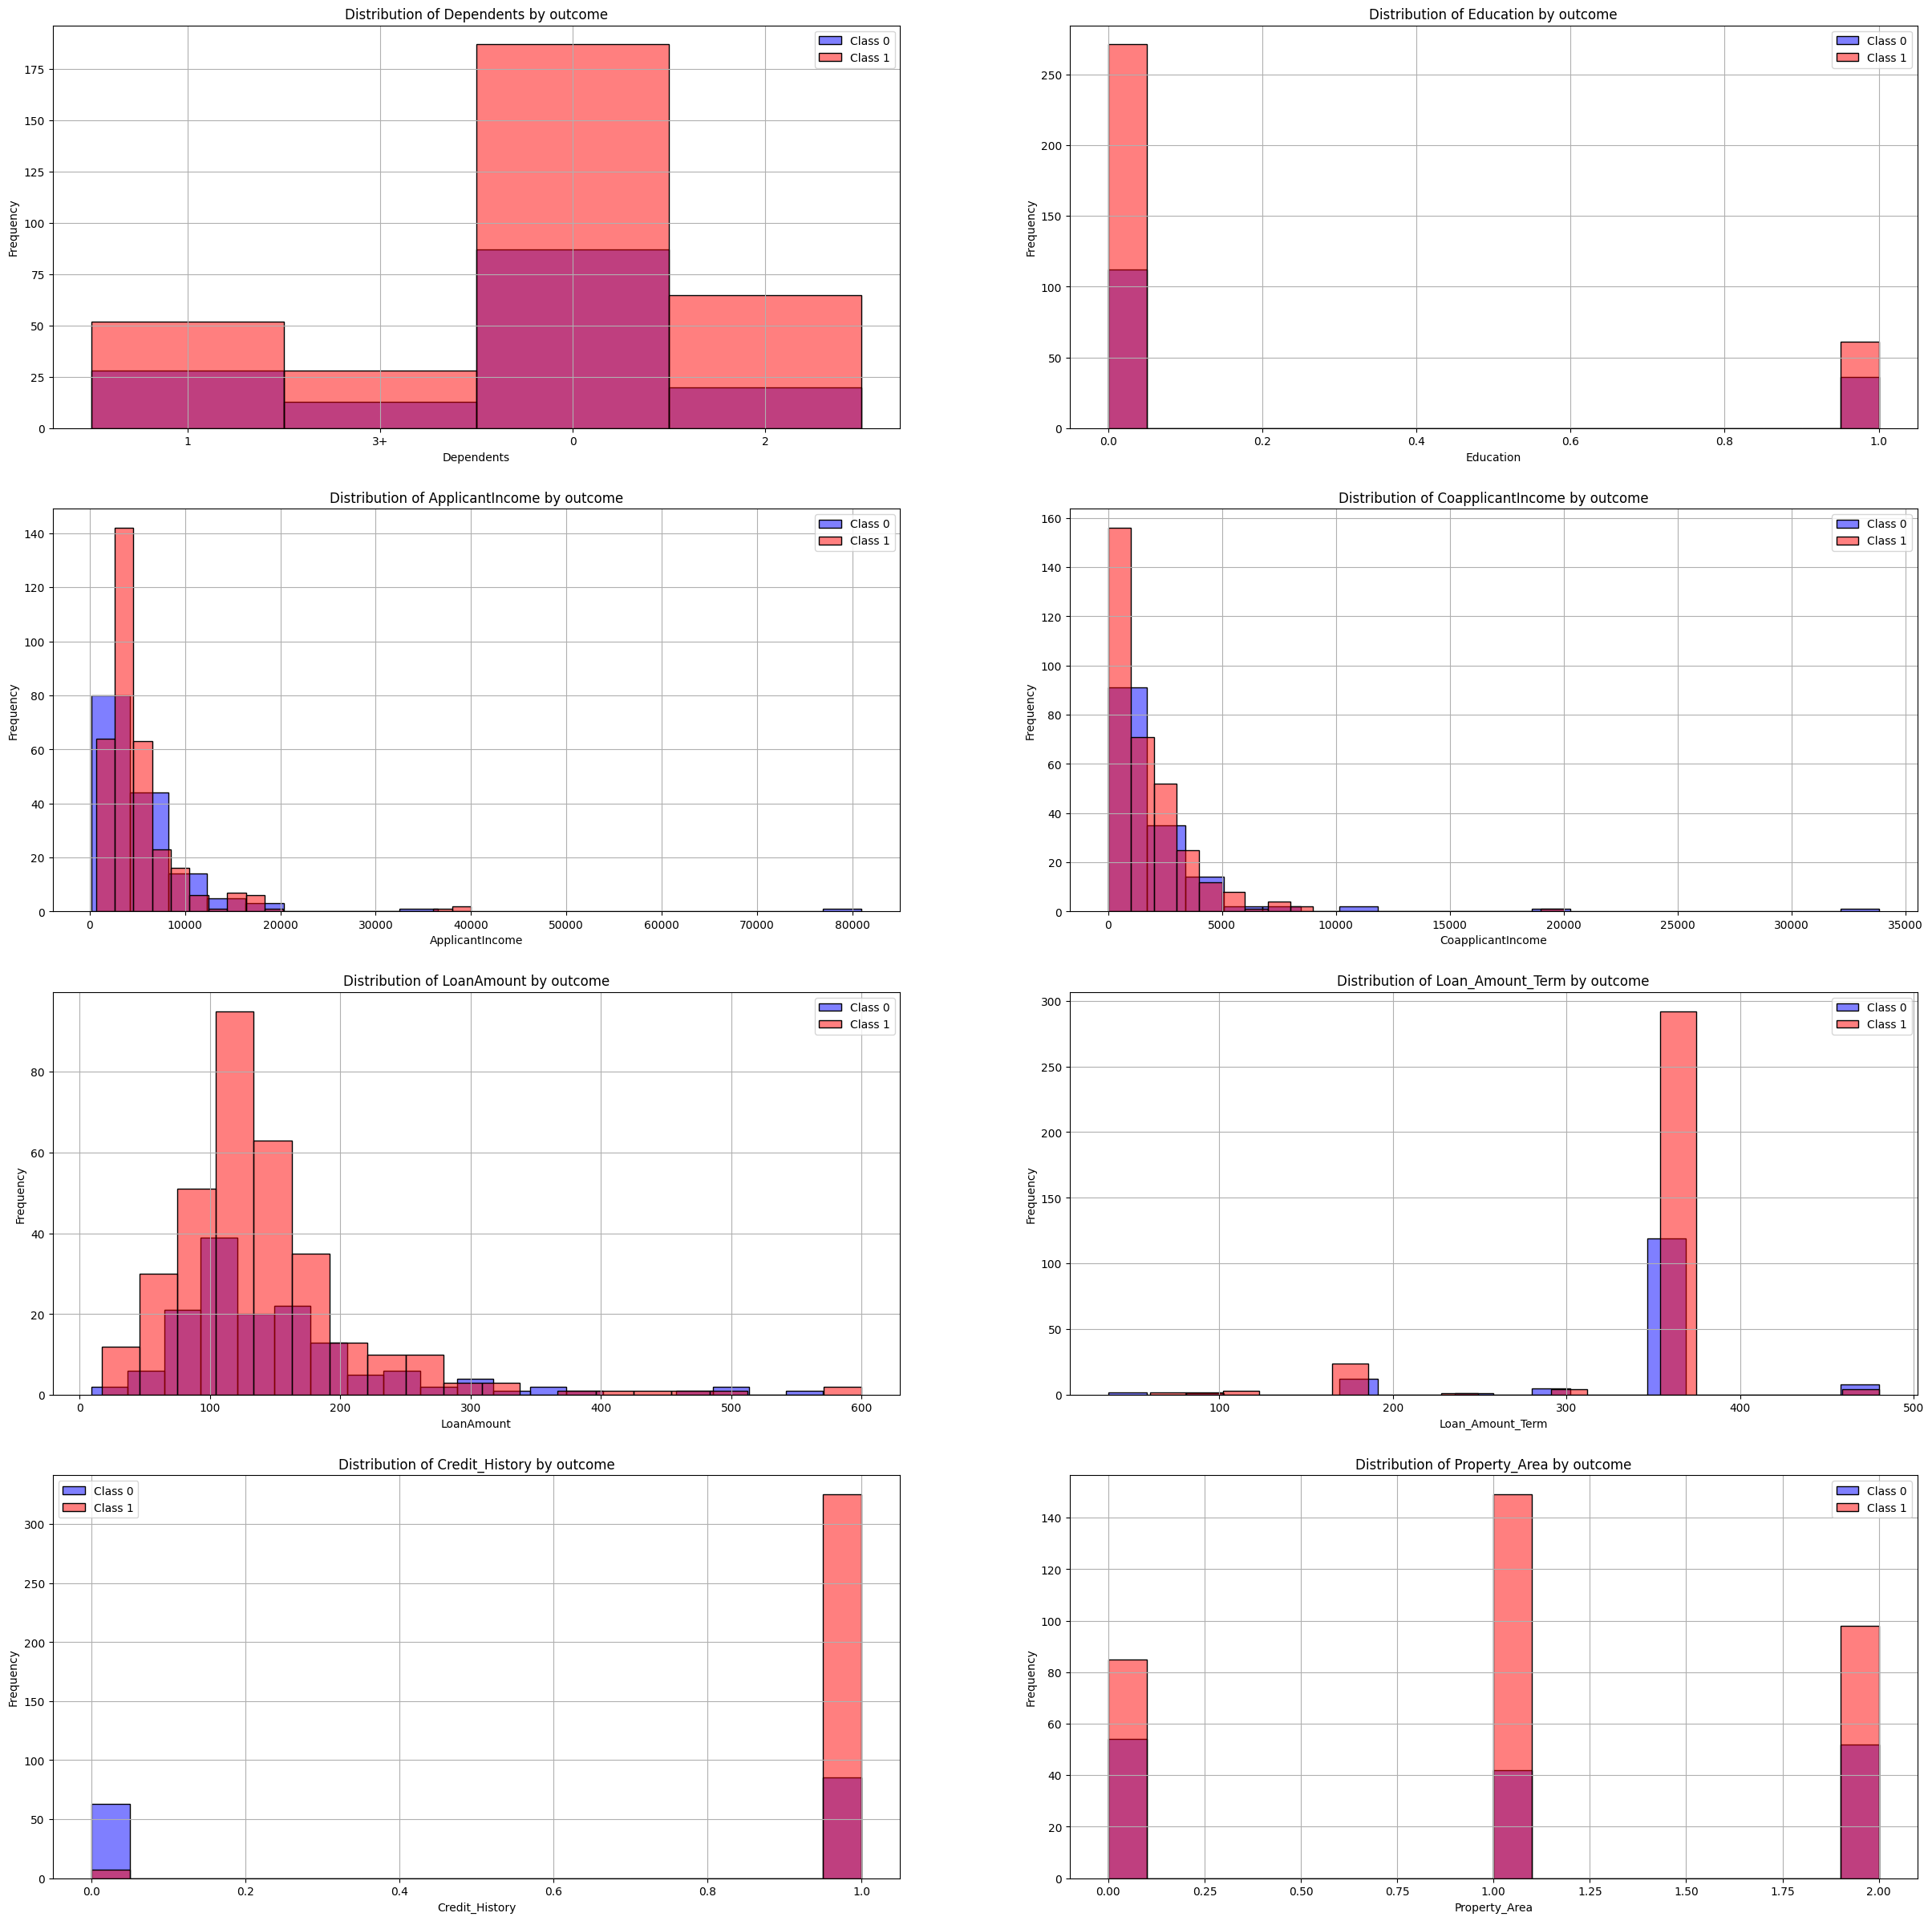

In [7]:
features = ['Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
num_rows = len(features) // 2
num_cols = 2  
class_0 = df[df['Loan_Status'] == 'N']
class_1= df[df['Loan_Status'] == 'Y']
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for i, feature in enumerate(features):
    ax = axes[i // num_cols, i % num_cols]  
    sns.histplot(class_0[feature], bins=20, color='blue', alpha=0.5, label='Class 0', ax=ax)
    sns.histplot(class_1[feature], bins=20, color='red', alpha=0.5, label='Class 1', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature} by outcome')
    ax.legend()
    ax.grid(True)

In [9]:
x['Dependents'] = x['Dependents'].replace('3+',3)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
Ks = 20
mean_accuracy = np.zeros((Ks-1))
for i in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors= i).fit(x_train,y_train)
    y_hat = neigh.predict(x_test)
    mean_accuracy[i-1] = accuracy_score(y_true=y_test,y_pred=y_hat)

print(mean_accuracy.max())
print(mean_accuracy.argmax() + 1)

0.65625
9


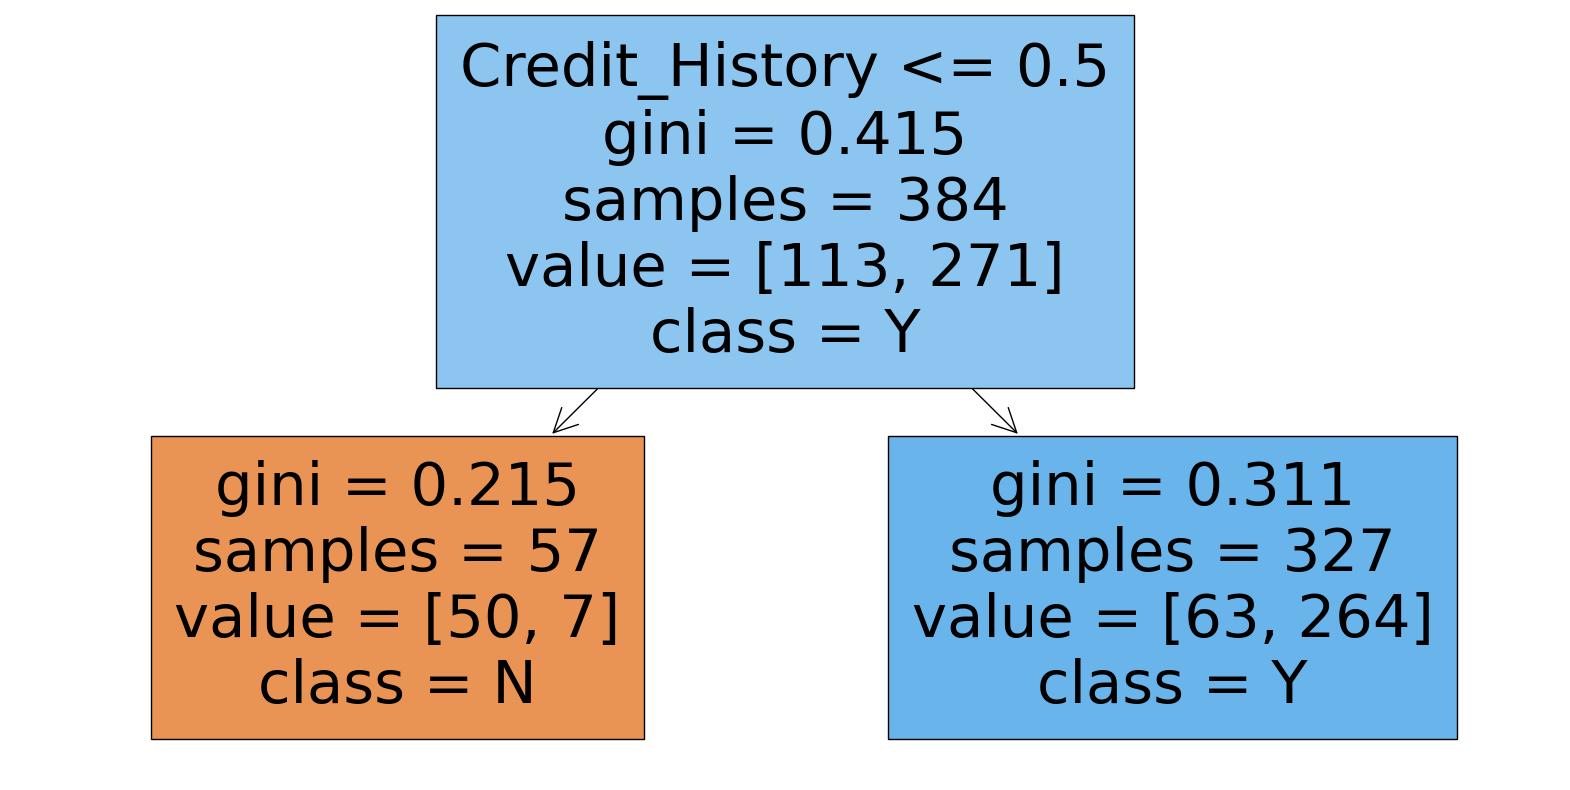

In [13]:
Ks = 10
tree_accuracy = np.zeros(Ks)
for i in range(1,Ks):
    tree = DecisionTreeClassifier(max_depth= i).fit(x_train,y_train)
    y_hat = tree.predict(x_test)
    tree_accuracy[i-11] = accuracy_score(y_test,y_hat)

tree = DecisionTreeClassifier(max_depth=1).fit(x_train,y_train)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=x.columns, class_names=['N', 'Y'], filled=True)
plt.show()
